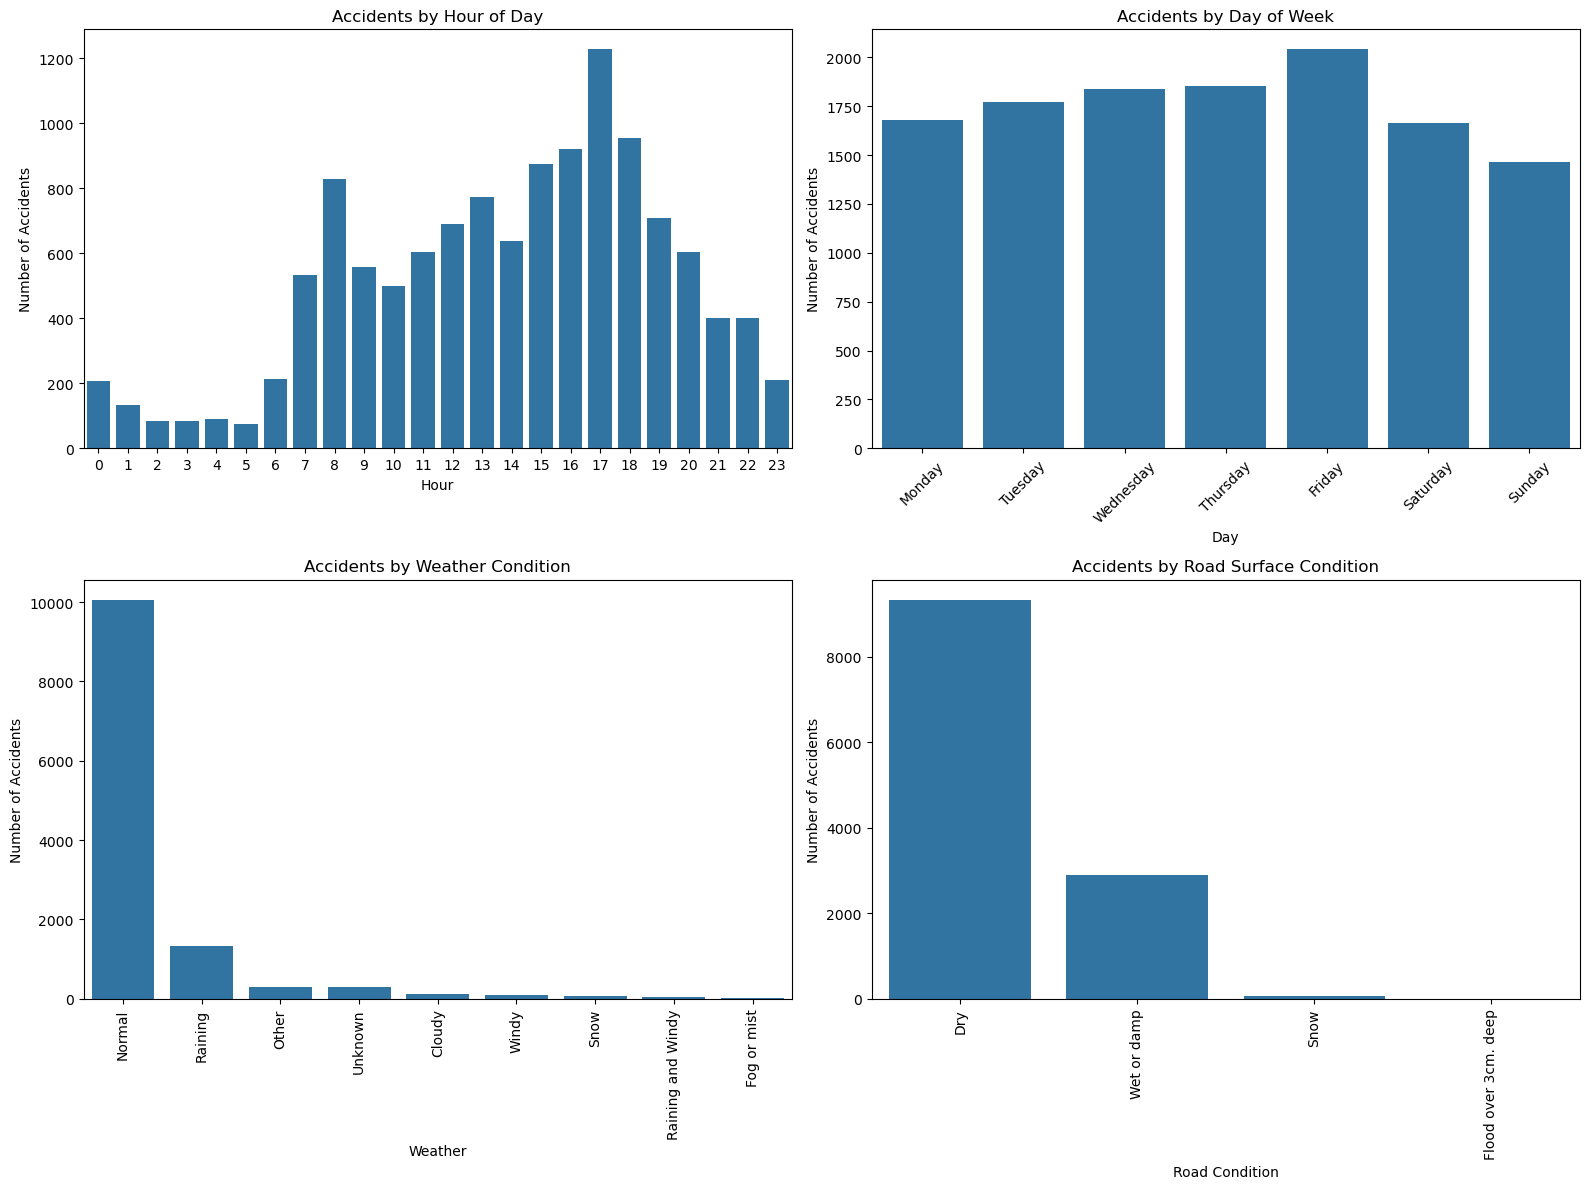

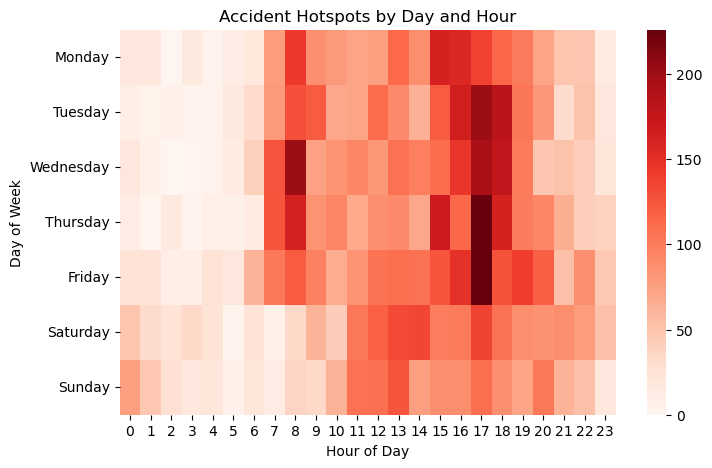

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\asus\Desktop\prodigy\RTA Dataset.csv')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour

accidents_by_hour = df['Time'].value_counts().sort_index()
accidents_by_day = df['Day_of_week'].value_counts().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
accidents_by_weather = df['Weather_conditions'].value_counts()
accidents_by_road = df['Road_surface_conditions'].value_counts()

plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
sns.barplot(x=accidents_by_hour.index, y=accidents_by_hour.values)
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')

plt.subplot(2,2,2)
sns.barplot(x=accidents_by_day.index, y=accidents_by_day.values)
plt.title('Accidents by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)

plt.subplot(2,2,3)
sns.barplot(x=accidents_by_weather.index, y=accidents_by_weather.values)
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)

plt.subplot(2,2,4)
sns.barplot(x=accidents_by_road.index, y=accidents_by_road.values)
plt.title('Accidents by Road Surface Condition')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

heatmap_data = df.groupby(['Day_of_week', 'Time']).size().unstack(fill_value=0)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(ordered_days)

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, cmap='Reds')
plt.title('Accident Hotspots by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()
